# DAND - Wrangle and Analyze Data

## Project Description
(From Udacity project site)<br><br>
The dataset that you will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage. <br><br>
WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for you to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. More on this soon.

# 1. Gather

## Load flat files

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import time

In [2]:
# load the dataset. (I directly read a csv file from url)
df_dog_rating = pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv')

In [3]:
df_dog_rating.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
# load the dataset. (I directly read a tsv file from url)
df_breed = pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv', sep='\t')

In [5]:
df_breed.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Load tweets from tweetpy

In [6]:
import tweepy

consumer_key = '---'
consumer_secret = '---'
access_token = '---'
access_secret = '---'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [7]:
tweet_ids = df_dog_rating.tweet_id.values
tweet_ids.shape

(2356,)

In [8]:
list_success_id = []
list_fail_id = []
start=time.time()
for t in tweet_ids:
    try:
        tweet = api.get_status(t, tweet_mode='extended')
        list_success_id.append(tweet._json)
    except:
        list_fail_id.append(t)
        print(t)
end = time.time()
print(end - start)
print(list_fail_id)

888202515573088257
873697596434513921
872668790621863937
872261713294495745
869988702071779329
866816280283807744
861769973181624320
856602993587888130
851953902622658560
845459076796616705
844704788403113984
842892208864923648
837366284874571778
837012587749474308
829374341691346946
827228250799742977
812747805718642688
802247111496568832
779123168116150273
775096608509886464
771004394259247104
770743923962707968
759566828574212096


Rate limit reached. Sleeping for: 600


754011816964026368
680055455951884288


Rate limit reached. Sleeping for: 596


1993.2294125556946
[888202515573088257, 873697596434513921, 872668790621863937, 872261713294495745, 869988702071779329, 866816280283807744, 861769973181624320, 856602993587888130, 851953902622658560, 845459076796616705, 844704788403113984, 842892208864923648, 837366284874571778, 837012587749474308, 829374341691346946, 827228250799742977, 812747805718642688, 802247111496568832, 779123168116150273, 775096608509886464, 771004394259247104, 770743923962707968, 759566828574212096, 754011816964026368, 680055455951884288]


In [9]:
print(len(list_fail_id))

25


In [10]:
df_tweet_status = pd.DataFrame(list_success_id)

In [11]:
df_tweet_status.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN


# Assess

## Ratings

### Visually

In [12]:
df_dog_rating

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [13]:
df_dog_rating.source.iloc[0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

### Programmatically

In [14]:
df_dog_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [15]:
df_dog_rating.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [16]:
print(df_dog_rating.doggo.unique())
print(df_dog_rating.pupper.unique())
print(df_dog_rating.puppo.unique())
print(df_dog_rating.floofer.unique())

['None' 'doggo']
['None' 'pupper']
['None' 'puppo']
['None' 'floofer']


In [17]:
df_dog_rating.loc[(df_dog_rating.doggo == 'None') & (df_dog_rating.pupper == 'None') & (df_dog_rating.puppo == 'None') & (df_dog_rating.floofer == 'None')] 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [18]:
df_dog_rating.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [19]:
df_dog_rating.loc[df_dog_rating['rating_numerator']==204]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None


In [20]:
df_dog_rating.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [21]:
df_dog_rating.name.value_counts().head(20)

None       745
a           55
Charlie     12
Oliver      11
Cooper      11
Lucy        11
Tucker      10
Penny       10
Lola        10
Bo           9
Winston      9
the          8
Sadie        8
Toby         7
Bailey       7
Buddy        7
an           7
Daisy        7
Jax          6
Leo          6
Name: name, dtype: int64

In [22]:
# check rows visually where the denominator is not equal to 10
df_dog_rating.loc[df_dog_rating['rating_denominator']!=10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


##### Quality Issue

- The type of `in_reply_to_status_id` and `in_reply_to_user_id` columns should be **int**, not float.
- The type of `retweeted_status_timestamp` and `timestamp` columns are string, not np.datetime64.
- There are missing values in `in_reply_to_status_id`,`in_reply_to_user_id`,`retweeted_status_id`,`retweeted_status_user_id`,  `retweeted_status_timestamp`, and `expanded_urls`.
- Missing values in the `name`, `doggo`,`pupper`, `puppo`, and `floofer` are represented as 'None'
- There are strange dog names such as 'a', 'an', and 'the'.
- There are some starnge values in `rating_numerator` and `rating_denominator` columns such as '1776'.
- URLs in `source` column contains 'a' tag.

##### Tidiness Issue

- `doggo`, `floofer`, `pupper`, and `puppo` columns should be merged into one column `dog_type`.

## Predictions

### Visually

In [23]:
df_breed

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


### Programmatically

In [24]:
df_breed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [25]:
df_breed.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [26]:
df_breed.p1_dog.unique()

array([ True, False])

In [27]:
df_breed.loc[df_breed['p1_dog']==False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2026,882045870035918850,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,1,web_site,0.949591,False,dhole,0.017326,False,golden_retriever,0.006941,True
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False


##### Quality Issue

- There are somethings, not dogs (`p1_dog`==False).
- The number of rows is 2075. That means some tweets in `df_dog_rating` are not corresponded to the prediction dataset.

## Tweets from tweepy

### Visually

In [28]:
df_tweet_status

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2326,Mon Nov 16 00:24:50 +0000 2015,666049248165822465,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2327,Mon Nov 16 00:04:52 +0000 2015,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2328,Sun Nov 15 23:21:54 +0000 2015,666033412701032449,666033412701032449,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2329,Sun Nov 15 23:05:30 +0000 2015,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN


### Programmatically

In [29]:
df_tweet_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 32 columns):
created_at                       2331 non-null object
id                               2331 non-null int64
id_str                           2331 non-null object
full_text                        2331 non-null object
truncated                        2331 non-null bool
display_text_range               2331 non-null object
entities                         2331 non-null object
extended_entities                2059 non-null object
source                           2331 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null object
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null object
in_reply_to_screen_name          77 non-null object
user                             2331 non-null object
geo                              0 non-null object
coordinates                      0 non-null

In [30]:
df_tweet_status.describe()

,id,in_reply_to_status_id,in_reply_to_user_id,retweet_count,favorite_count,quoted_status_id
count,2.331000e+03,7.700000e+01,7.700000e+01,2331.000000,2331.000000,2.600000e+01
mean,7.419079e+17,7.440692e+17,2.040329e+16,2646.051051,7429.878593,8.113972e+17
std,6.823170e+16,7.524295e+16,1.260797e+17,4474.842642,11535.976511,6.295843e+16
min,6.660209e+17,6.658147e+17,1.185634e+07,1.000000,0.000000,6.721083e+17
25%,6.782670e+17,6.757073e+17,3.589728e+08,536.500000,1292.500000,7.761338e+17
50%,7.182469e+17,7.032559e+17,4.196984e+09,1237.000000,3230.000000,8.281173e+17
75%,7.986692e+17,8.233264e+17,4.196984e+09,3070.000000,9092.500000,8.637581e+17
max,8.924206e+17,8.862664e+17,8.405479e+17,76024.000000,153366.000000,8.860534e+17


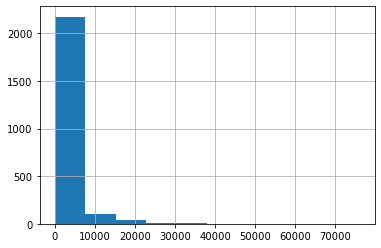

In [31]:
df_tweet_status.retweet_count.hist()

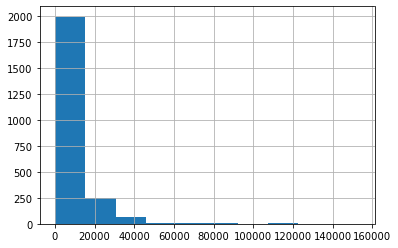

In [32]:
df_tweet_status.favorite_count.hist()

##### Quality Issue

- The number of rows is 2331. That means some tweets in `df_dog_rating` are not corresponded to the `retweet_count` and `favorite count` columns in this dataset.

##### Tidiness Issue

- `entities` and `extended_entities` contain multiple values. Those values should be seperated as independant columns. However, in this project, we don't need to solve this problem because we will use `retweet_count` and `favorite_count` only. 

##### Tidiness Issue (Common)

- the three dataframe should be merged into one dataframe because each row in the dataframes is about a same tweet.

# Clean

##  Define
#### df_dog_rating

- Drop unnecessary columns (here I decided to drop `in_reply_to_status_id`, `in_reply_to_user_id`, `source`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, and `expanded_urls`). 
- Change types of `timestamp` columns to np.datetime64.
- Change missing values in the `name`, `doggo`,`pupper`, `puppo`, and `floofer` into np.nan.
- Change strange dog names (e.g. 'a') into np.nan.
- drop the rows where the denoinator is not equal to 10.
- drop the row where the numerator is more than 15.

- merge `name`, `doggo`,`pupper`, `puppo`, and `floofer` into one column

#### df_breed

- drop the rows where the picture were not predicted as dog.

#### Common

- merge the three dataframe into one dataframe using inner join.

## Code

In [33]:
# drop the unnecessary columns
df_dog_rating = df_dog_rating.drop(['in_reply_to_status_id',
                                    'in_reply_to_user_id',
                                    'source', 
                                    'retweeted_status_id', 
                                    'retweeted_status_user_id',
                                    'retweeted_status_timestamp',
                                    'expanded_urls'], axis=1)

In [34]:
df_dog_rating['timestamp'] = pd.to_datetime(df_dog_rating['timestamp'])

In [35]:
# replace 'None' in 'name', 'doggo', 'floofer', 'pupper', and 'puppo' to np.nan
df_dog_rating['name'] = df_dog_rating['name'].replace('None',np.nan) 

In [36]:
df_dog_rating['doggo'] = df_dog_rating['doggo'].replace('None',np.nan) 
df_dog_rating['floofer'] = df_dog_rating['floofer'].replace('None',np.nan) 
df_dog_rating['pupper'] = df_dog_rating['pupper'].replace('None',np.nan) 
df_dog_rating['puppo'] = df_dog_rating['puppo'].replace('None',np.nan) 

In [37]:
# replace 'a' in 'name' to np.nan
df_dog_rating['name'] = df_dog_rating['name'].replace('a',np.nan) 
df_dog_rating['name'] = df_dog_rating['name'].replace('an',np.nan) 
df_dog_rating['name'] = df_dog_rating['name'].replace('the',np.nan) 

In [38]:
# drop the rows where the denoinator is not equal to 10
df_dog_rating = df_dog_rating[df_dog_rating['rating_denominator']==10]

In [39]:
# drop the row where the numerator is more than 15
df_dog_rating = df_dog_rating[df_dog_rating['rating_numerator']<16]

In [40]:
df_dog_rating.loc[df_dog_rating['doggo']=='doggo']

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
9,890240255349198849,2017-07-26 15:59:51+00:00,This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,NaN,NaN,NaN
43,884162670584377345,2017-07-09 21:29:42+00:00,Meet Yogi. He doesn't have any important dog m...,12,10,Yogi,doggo,NaN,NaN,NaN
99,872967104147763200,2017-06-09 00:02:31+00:00,Here's a very large dog. He has a date later. ...,12,10,NaN,doggo,NaN,NaN,NaN
108,871515927908634625,2017-06-04 23:56:03+00:00,This is Napolean. He's a Raggedy East Nicaragu...,12,10,Napolean,doggo,NaN,NaN,NaN
110,871102520638267392,2017-06-03 20:33:19+00:00,Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,14,10,NaN,doggo,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1117,732375214819057664,2016-05-17 01:00:32+00:00,This is Kyle (pronounced 'Mitch'). He strives ...,11,10,Kyle,doggo,NaN,NaN,NaN
1141,727644517743104000,2016-05-03 23:42:26+00:00,Here's a doggo struggling to cope with the win...,13,10,NaN,doggo,NaN,NaN,NaN
1156,724771698126512129,2016-04-26 01:26:53+00:00,Nothin better than a doggo and a sunset. 11/10...,11,10,NaN,doggo,NaN,NaN,NaN
1176,719991154352222208,2016-04-12 20:50:42+00:00,This doggo was initially thrilled when she saw...,10,10,NaN,doggo,NaN,NaN,NaN


In [41]:
def dog_type(x):
    if x['doggo'] == 'doggo':
        return 'doggo'
    elif x['floofer'] == 'floofer':
        return 'floofer'
    elif x['pupper'] == 'pupper':
        return 'pupper'
    elif x['puppo'] == 'puppo':
        return 'puppo'
    else:
        return np.nan

In [42]:
df_dog_rating['type'] = df_dog_rating.apply(lambda x:dog_type(x), axis=1)

In [43]:
df_dog_rating = df_dog_rating.drop(['doggo','floofer','pupper','puppo'], axis=1)

In [44]:
df_dog_rating.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,type
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN


In [45]:
# drop the rows where tweet is not predicted as a dog 
df_breed = df_breed.loc[df_breed['p1_dog']==True]

In [46]:
# merge the dataframes
df_dog_tweet = df_dog_rating.copy()
df_dog_tweet = df_dog_tweet.merge(df_breed[['tweet_id','p1']], on='tweet_id', how='inner')

In [47]:
df_dog_tweet = df_dog_tweet.rename(columns={'p1':'breed'})

In [48]:
# merge the dataframes
df_dog_tweet = df_dog_tweet.merge(df_tweet_status[['id','retweet_count', 'favorite_count']], 
                                  left_on='tweet_id',
                                  right_on='id',
                                  how='inner')

In [49]:
# drop duplicated id column
df_dog_tweet = df_dog_tweet.drop('id', axis=1)

## Test

Here, I decided not to remove NaN values in `name` and `type` columns because to get maximum records as much as possible regarding each column. Keeping those rows will be helpful when we investigate the dataframe without `name` and `type` columns.

In [50]:
df_dog_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1502 entries, 0 to 1501
Data columns (total 10 columns):
tweet_id              1502 non-null int64
timestamp             1502 non-null datetime64[ns, UTC]
text                  1502 non-null object
rating_numerator      1502 non-null int64
rating_denominator    1502 non-null int64
name                  1087 non-null object
type                  234 non-null object
breed                 1502 non-null object
retweet_count         1502 non-null int64
favorite_count        1502 non-null int64
dtypes: datetime64[ns, UTC](1), int64(5), object(4)
memory usage: 129.1+ KB


In [51]:
df_dog_tweet['breed'].value_counts().head(20)

golden_retriever             146
Labrador_retriever            94
Pembroke                      88
Chihuahua                     81
pug                           57
chow                          44
Samoyed                       42
toy_poodle                    38
Pomeranian                    37
malamute                      30
cocker_spaniel                30
French_bulldog                25
Chesapeake_Bay_retriever      23
miniature_pinscher            23
German_shepherd               20
Cardigan                      19
Siberian_husky                19
Shetland_sheepdog             18
Staffordshire_bullterrier     18
beagle                        18
Name: breed, dtype: int64

In [52]:
df_dog_tweet['name'].value_counts().head(20)

Cooper     10
Tucker      9
Oliver      9
Charlie     9
Penny       8
Sadie       7
Bo          7
Lucy        7
Daisy       7
Jax         6
Koda        6
Rusty       6
Winston     6
Stanley     5
Leo         5
Toby        5
Scout       5
Lola        5
Bella       5
Dave        5
Name: name, dtype: int64

## Store the dataset as csv file

In [53]:
df_dog_tweet.to_csv('twitter_archive_master.csv', index=False)

# Storing, Analyzing, and Visualizing Data for this Project

In [54]:
df_dog_tweet.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,type,breed,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,Chihuahua,5585,30773
1,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,Chihuahua,3701,23142
2,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,basset,8308,37108
3,891087950875897856,2017-07-29 00:08:17+00:00,Here we have a majestic great white breaching ...,13,10,NaN,NaN,Chesapeake_Bay_retriever,2783,18706
4,890971913173991426,2017-07-28 16:27:12+00:00,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,NaN,Appenzeller,1809,10865


## Insight  1. Which breeds are received good ratings?  

Based on the average ratings of each breed, top 10 group and bottom 10 group are identified as below bar chart. I also investigate the distribution of ratings in the top 10 and bottom group dogs (histogram). Based on the histogram, the dogs in the top 10 group mostly get a better grades than the dogs in the bottom 10 group.

In [55]:
top_10_breed = df_dog_tweet.groupby('breed').mean()['rating_numerator'].sort_values(ascending=False).index.tolist()[:10]
print(top_10_breed)

['Saluki', 'Tibetan_mastiff', 'briard', 'Border_terrier', 'standard_schnauzer', 'silky_terrier', 'giant_schnauzer', 'Irish_setter', 'Eskimo_dog', 'Gordon_setter']


In [56]:
bottom_10_breed = df_dog_tweet.groupby('breed').mean()['rating_numerator'].sort_values(ascending=True).index.tolist()[:10]
print(bottom_10_breed)

['Japanese_spaniel', 'soft-coated_wheaten_terrier', 'Scotch_terrier', 'Ibizan_hound', 'Walker_hound', 'Welsh_springer_spaniel', 'Norwich_terrier', 'miniature_schnauzer', 'Tibetan_terrier', 'dalmatian']


In [57]:
df_top_10 = df_dog_tweet.loc[df_dog_tweet['breed'].isin(top_10_breed)].sort_values('rating_numerator', ascending=False)
df_bottom_10 = df_dog_tweet.loc[df_dog_tweet['breed'].isin(bottom_10_breed)].sort_values('rating_numerator', ascending=False)

In [58]:
list_hue_order = ['#2196F3']*10+['#636363']*(df_dog_tweet['breed'].nunique()-20)+['#F44336']*10

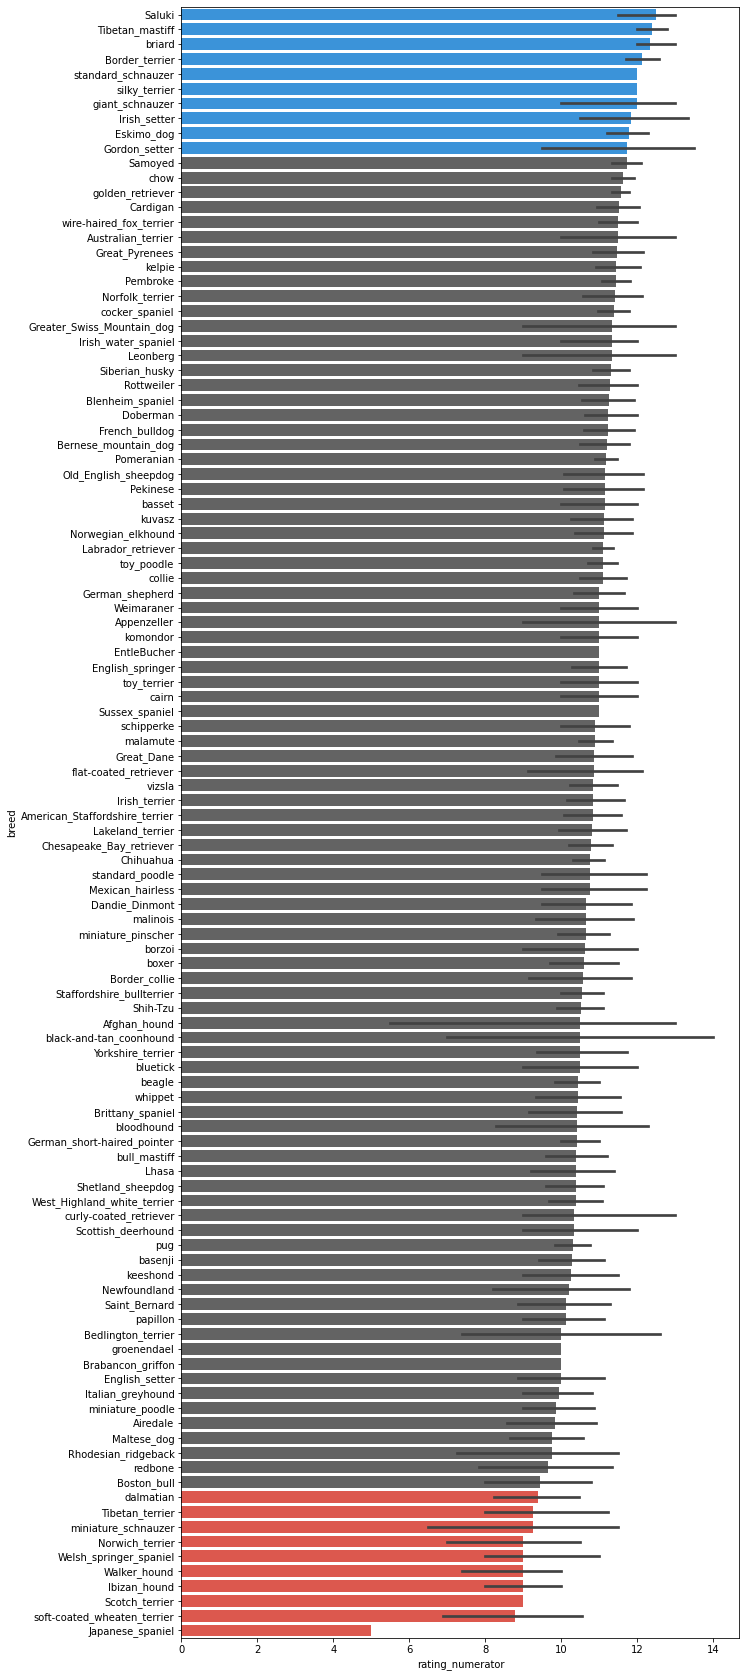

In [59]:
plt.figure(figsize=(10,30))
sns.barplot(x=df_dog_tweet['rating_numerator'], 
            y=df_dog_tweet['breed'],
            order = df_dog_tweet.groupby('breed').mean()['rating_numerator'].sort_values(ascending=False).index.tolist(),
            palette=list_hue_order)

Text(0.5, 0, 'rating_numerator')

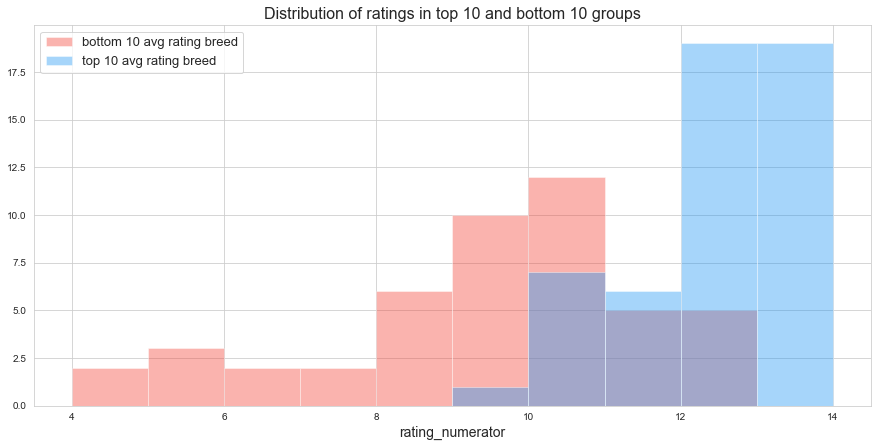

In [76]:
# visualize histograms of ratings in top and bottom 10 group
plt.figure(figsize=(15,7))
sns.set_style('whitegrid')
sns.distplot(df_bottom_10['rating_numerator'], kde=False, color='#F44336', label='bottom 10 avg rating breed')
sns.distplot(df_top_10['rating_numerator'], kde=False, color='#2196F3', label='top 10 avg rating breed')
plt.legend(fontsize=13)
plt.title('Distribution of ratings in top 10 and bottom 10 groups',fontsize=16)
plt.xlabel('rating_numerator', fontsize=14)

## Insight 2. Is there any relationship between the name and breed of a dog?

To increase readability, I consider the most 30 popular breeds and names. As a below matrix, most of the popular breeds correspond to multiple names. Therefore, it is a little bit hard to say there is any relationship between the name and breed.

In [61]:
list_breed = df_dog_tweet.groupby('breed').count()['tweet_id'].sort_values(ascending=False).index.tolist()[:30]

In [62]:
list_name = df_dog_tweet.groupby('name').count()['tweet_id'].sort_values(ascending=False).index.tolist()[:30]

In [63]:
df_dog_tweet_filtered = df_dog_tweet.loc[df_dog_tweet['breed'].isin(list_breed)]
df_dog_tweet_filtered = df_dog_tweet_filtered.loc[df_dog_tweet_filtered['name'].isin(list_name)]

In [64]:
df_breed_name_pivot = pd.pivot_table(data = df_dog_tweet_filtered ,
                                     values='tweet_id',
                                     index='breed',
                                     columns='name',
                                     aggfunc=lambda x: len(x.unique()))

In [65]:
df_breed_name_pivot = df_breed_name_pivot.fillna(0)

<Figure size 1440x720 with 0 Axes>

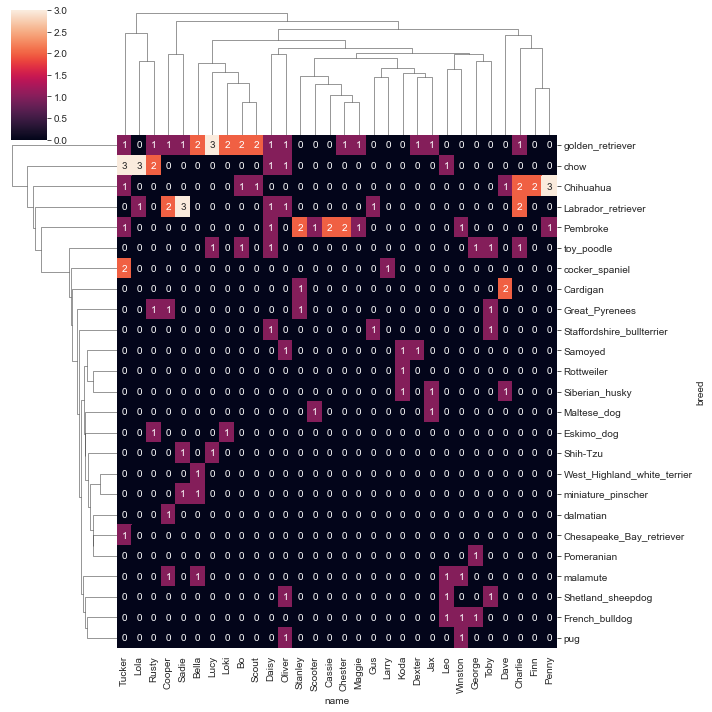

In [74]:
plt.figure(figsize=(20,10))
sns.clustermap(df_breed_name_pivot, annot=True);

## Insight 3. How are the ratings, retweet counts, and favorites counts correlated with each other?

Text(0, 0.5, 'retweet_count')

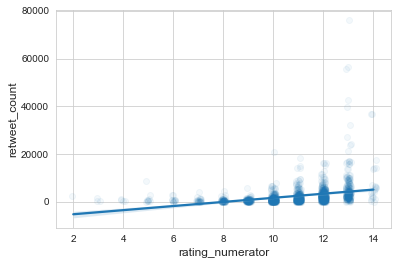

In [78]:
sns.regplot(x=df_dog_tweet['rating_numerator'], y= df_dog_tweet['retweet_count'],  x_jitter=0.1, scatter_kws={'alpha' : 1/20})
plt.xlabel('rating_numerator', fontsize=12)
plt.ylabel('retweet_count', fontsize=12)

Text(0, 0.5, 'favorite_count')

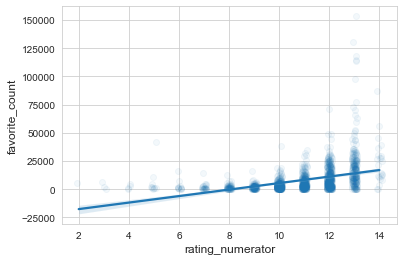

In [79]:
sns.regplot(x=df_dog_tweet['rating_numerator'], y= df_dog_tweet['favorite_count'], x_jitter=0.1, scatter_kws={'alpha' : 1/20})
plt.xlabel('rating_numerator', fontsize=12)
plt.ylabel('favorite_count', fontsize=12)

Text(0, 0.5, 'favorite_count')

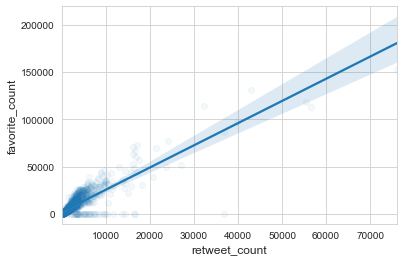

In [80]:
sns.regplot(x=df_dog_tweet['retweet_count'], y= df_dog_tweet['favorite_count'], scatter_kws={'alpha' : 1/20})
plt.xlabel('retweet_count', fontsize=12)
plt.ylabel('favorite_count', fontsize=12)

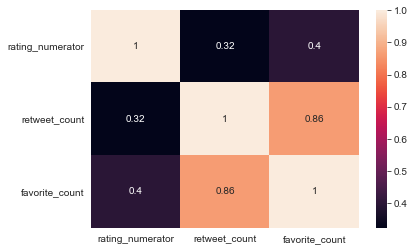

In [82]:
sns.heatmap(df_dog_tweet[['rating_numerator','retweet_count','favorite_count']].corr(), annot=True)